In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import gymnasium as gym

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Taxi:
    def __init__(self, alpha: float = 0.9, 
                 epsilon: float = 0.9, gamma: float = 0.9):
        self.env = gym.make("Taxi-v3")
        self.state_n = self.env.observation_space.n  # количество состояний в среде
        self.action_n = self.env.action_space.n  # количество действий в среде
        self.Q = np.zeros((self.state_n, self.action_n))
        
        self.total_rewards = []
        
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        

    def epsilon_greedy(self, Qs, epsilon, action_n):
        """
        Q: np.array, shape = (dim observation_space, dim action_space)
        epsilon: float
        action_n: int
        """        
        
        policy = np.ones(self.action_n) * epsilon / self.action_n
        max_action = np.argmax(Qs)
        policy[max_action] += 1 - epsilon
        
        return np.random.choice(np.arange(action_n), p=policy), policy
    
    def SARSA(self, episode_n=100, len_trajectory=5000):
        for episode in range(episode_n):
            epsilon = self.epsilon / (episode + 1)
            
            state = self.env.reset()[0]
            action, _ = self.epsilon_greedy(self.Q[state], epsilon, self.action_n)
            
            self.total_rewards.append(0)
            
            
            for _ in range(len_trajectory):
                next_state, reward, done, _, _ = self.env.step(action)
                next_action, _ = self.epsilon_greedy(self.Q[next_state], epsilon, self.action_n)
                
                self.Q[state][action] += self.alpha * (reward + \
                        self.gamma * self.Q[next_state][next_action] - \
                        self.Q[state][action])
                    
                state = next_state
                action = next_action
                
                self.total_rewards[-1] += reward
                
                if done:
                    break
        
    
    def ExpextedSARSA(self, episode_n=100, len_trajectory=5000):
        """
        https://arxiv.org/abs/2201.09746 
        (Страница 73)
        """
        for episode in range(episode_n):
            epsilon = self.epsilon / (episode + 1)
            
            state = self.env.reset()[0]
            action, _ = self.epsilon_greedy(self.Q[state], epsilon, self.action_n)
            
            self.total_rewards.append(0)
            
            
            for _ in range(len_trajectory):
                next_state, reward, done, _, _ = self.env.step(action)
                next_action, next_policy = self.epsilon_greedy(self.Q[next_state], epsilon, self.action_n)
                
                self.Q[state][action] += self.alpha * (reward + \
                        self.gamma * np.dot(next_policy, self.Q[next_state]) - \
                        self.Q[state][action])
                    
                state = next_state
                action = next_action
                
                self.total_rewards[-1] += reward
                
                if done:
                    break
        

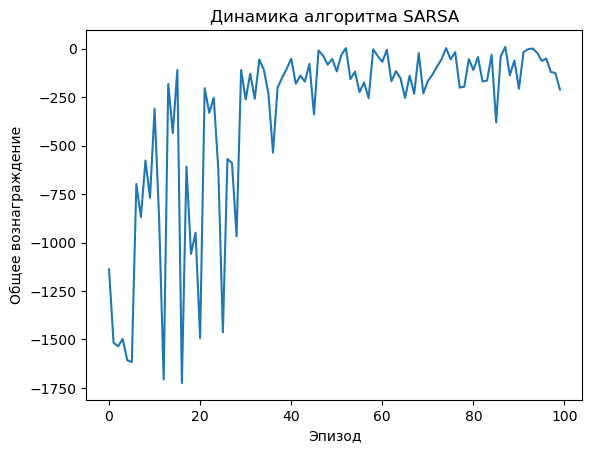

In [3]:
task = Taxi(alpha=0.5, epsilon=0.99, gamma=0.999)
task.SARSA(episode_n=100, len_trajectory=500)


plt.plot(task.total_rewards)
plt.title('Динамика алгоритма SARSA')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

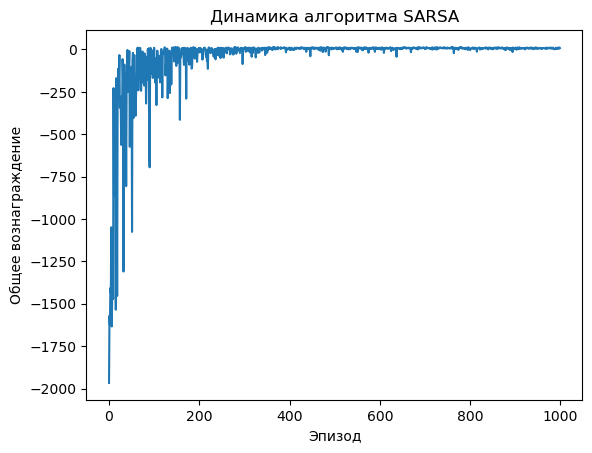

In [4]:
task = Taxi(alpha=0.5, epsilon=0.99, gamma=0.999)
task.SARSA(episode_n=1000, len_trajectory=500)


plt.plot(task.total_rewards)
plt.title('Динамика алгоритма SARSA')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

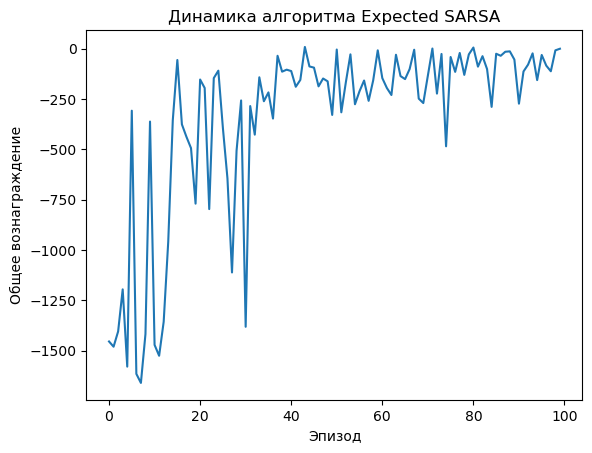

In [5]:
task = Taxi(alpha=0.5, epsilon=0.99, gamma=0.999)
task.ExpextedSARSA(episode_n=100, len_trajectory=500)


plt.plot(task.total_rewards)
plt.title('Динамика алгоритма Expected SARSA')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()

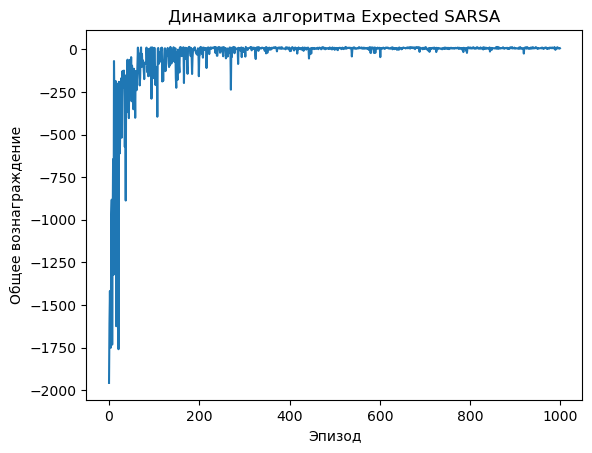

In [6]:
task = Taxi(alpha=0.5, epsilon=0.99, gamma=0.999)
task.ExpextedSARSA(episode_n=1000, len_trajectory=500)


plt.plot(task.total_rewards)
plt.title('Динамика алгоритма Expected SARSA')
plt.xlabel('Эпизод')
plt.ylabel('Общее вознаграждение')
plt.show()